In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [2]:
(x_train_pre, y_train), (x_test_pre, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_pre.shape

(60000, 28, 28)

In [4]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

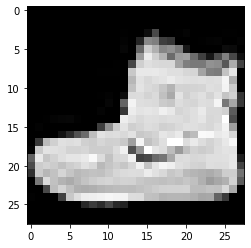

In [5]:
plt.imshow(x_train_pre[0])

In [6]:
x_train = (x_train_pre/255. - 0.5) * 2.
x_test = (x_test_pre/255. - 0.5) * 2.

In [7]:
x_train.max()

1.0

Creo un DF con tantas columnas como imagenes tiene el dataset, y donde las filas son 28x28 flatten

In [8]:
len(x_train)

60000

In [48]:
from tqdm import trange
train_df = pd.DataFrame()
for i in trange(len(x_train)):
  train_df[i] = x_train[i].flatten()

  0%|          | 0/60000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
100%|██████████| 60000/60000 [01:46<00:00, 564.86it/s]


In [49]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-0.992157,-1.0,-1.000000,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-1.0,-1.0,-1.0,-1.0,-1.0,0.309804,-1.0,0.858824,-1.0,-1.0,...,-0.396078,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.992157,-1.0
780,-1.0,-1.0,-1.0,-1.0,-1.0,-0.427451,-1.0,0.811765,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
781,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.450980,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0
782,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,...,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0


In [50]:
from sklearn.decomposition import PCA

In [61]:
pca_dim = min(train_df.shape[0], train_df.shape[1])
pca = PCA(n_components=pca_dim)

In [63]:
components = pca.fit_transform(X=train_df)

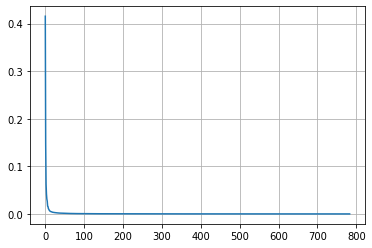

In [64]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()

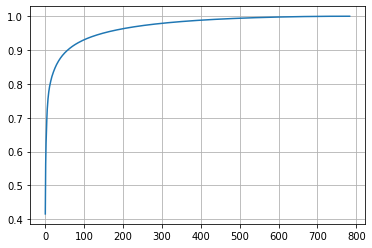

In [65]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()

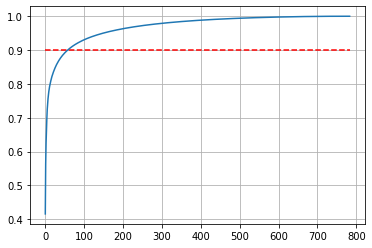

In [67]:
# aplicamos threshold de 90%
plt.plot(np.ones(pca_dim)*0.9, "--", c="r")
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()

In [68]:
pca.explained_variance_ratio_.cumsum()[1]

0.5625206361806614

In [69]:
np.argmax(pca.explained_variance_ratio_.cumsum() > 0.9)

58

In [70]:
pca.components_[0]

array([0.00371588, 0.00526867, 0.00275475, ..., 0.00598791, 0.00176789,
       0.00087904])

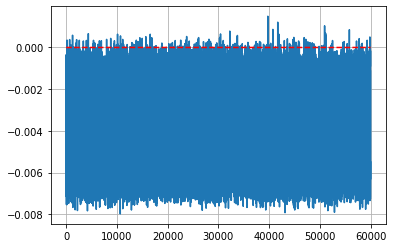

In [75]:
plt.plot(-pca.components_[0])
plt.plot(np.zeros(len(pca.components_[0])), "--", c="r")
plt.grid()

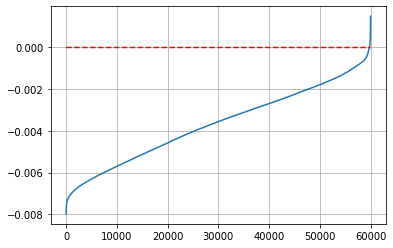

In [76]:
plt.plot(np.sort(-pca.components_[0]))
plt.plot(np.zeros(train_df.shape[1]), "--", c="r")
plt.grid()

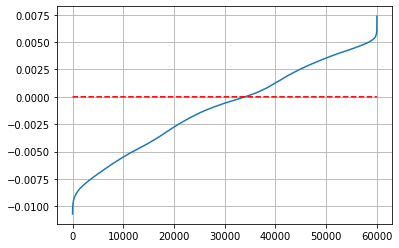

In [77]:
plt.plot(np.sort(-pca.components_[1]))
plt.plot(np.zeros(train_df.shape[1]), "--", c="r")
plt.grid()

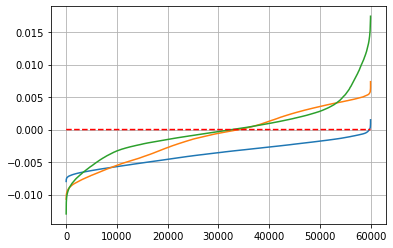

In [78]:
plt.plot(np.sort(-pca.components_[0]))
plt.plot(np.sort(-pca.components_[1]))
plt.plot(np.sort(-pca.components_[3]))

plt.plot(np.zeros(train_df.shape[1]), "--", c="r")
plt.grid()

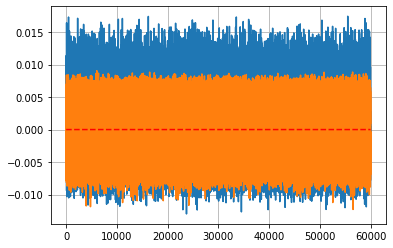

In [79]:
plt.plot(-pca.components_[3])
plt.plot(-pca.components_[2])

plt.plot(np.zeros(train_df.shape[1]), "--", c="r")
plt.grid()

In [80]:
pca.explained_variance_[0]

10856.7925245807

In [81]:
np.var(components[:, 0])

10842.944574931998

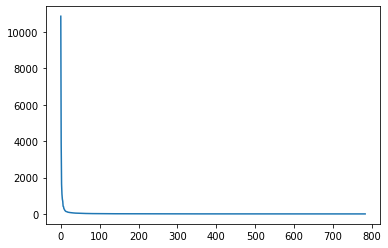

In [82]:
plt.plot(pca.explained_variance_)

In [83]:
from sklearn.mixture import GaussianMixture

In [84]:
pca2d = PCA(n_components=2)
components2d = pca2d.fit_transform(train_df)

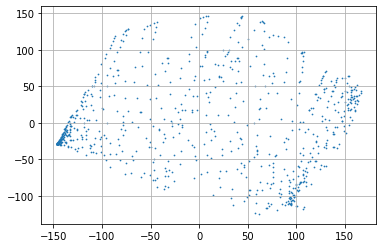

In [85]:
plt.scatter(components2d[:, 0], components2d[:, 1], s=0.5)
plt.grid()

In [86]:
gmm2 = GaussianMixture(n_components=2, covariance_type="diag")
gmm2.fit(components2d)

GaussianMixture(covariance_type='diag', n_components=2)

In [87]:
gmm2.sample()

(array([[-54.6063897 ,  51.46475207]]), array([1]))

In [33]:
# me hago un grid y me ploteo el contour
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-0.75, 0.75, 50)

Xp, Yp = np.meshgrid(xs, ys)
Xf = Xp.flatten()
Yf = Yp.flatten()
points = np.vstack([Xf, Yf])
Z = gmm2.score_samples(points.T)

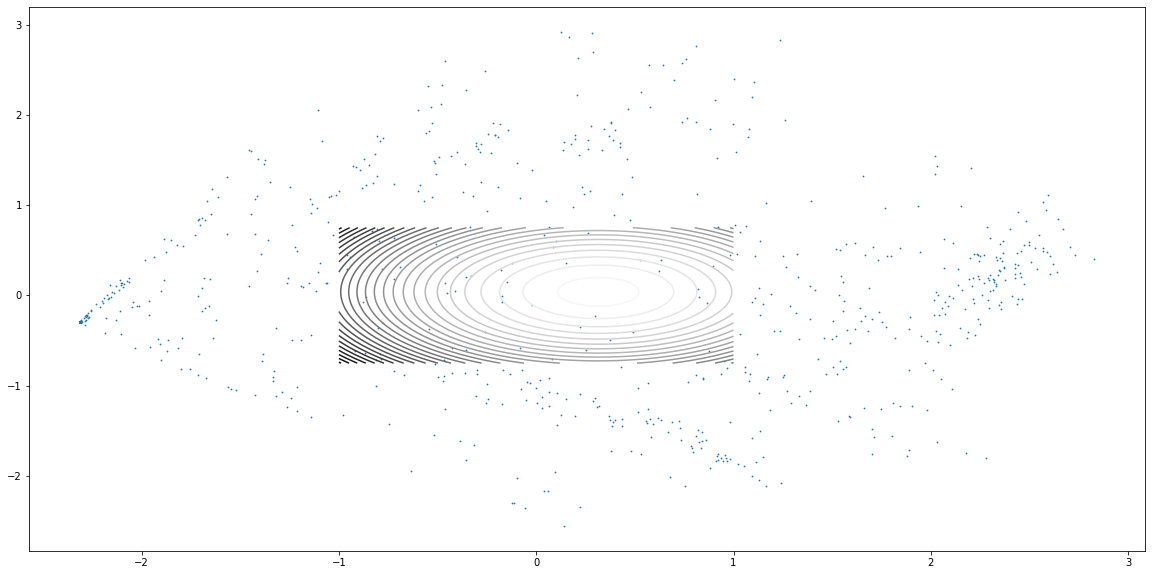

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(components2d[:,0], components2d[:, 1], s=0.6)
plt.contour(Xp, Yp, Z.reshape(50,50), 30)

In [35]:
# cómo evaluo entre modelos?
gmm2.bic(components2d)

3381.2909212071986

In [36]:
def gridsearchgmm(data, opt_ncomponents, opt_covariance):
    results = []
    for ncomponents in opt_ncomponents:
        for covariance in opt_covariance:
            gmm_trial = GaussianMixture(n_components=ncomponents, covariance_type=covariance)
            gmm_trial.fit(data)
            bic = gmm_trial.bic(data)
            print("ncomponents {}, covariance {}, bic is {}".format(ncomponents, covariance, bic))
            results.append(bic)
    return results

In [37]:
opt_ncomponents = np.arange(1,10)
opt_covariance = ["diag"]
results = gridsearchgmm(components2d, opt_ncomponents, opt_covariance)

ncomponents 1, covariance diag, bic is 5291.0578116620745
ncomponents 2, covariance diag, bic is 3381.290781657883
ncomponents 3, covariance diag, bic is 3333.37332112197
ncomponents 4, covariance diag, bic is 3080.627166724629
ncomponents 5, covariance diag, bic is 2949.555130466936
ncomponents 6, covariance diag, bic is 2904.143010201806
ncomponents 7, covariance diag, bic is 2934.2660254020684
ncomponents 8, covariance diag, bic is 2801.2236425218225
ncomponents 9, covariance diag, bic is 2849.8882279533786


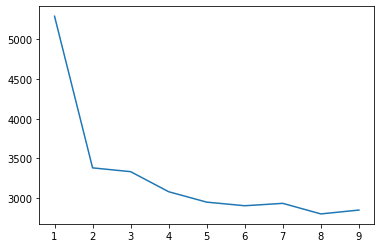

In [38]:
plt.plot(np.arange(1,10),results)

In [39]:
opt_ncomponents = np.arange(1,5)
opt_covariance = ["diag", "spherical", "full"]
results = gridsearchgmm(components2d, opt_ncomponents, opt_covariance)

ncomponents 1, covariance diag, bic is 5291.0578116620745
ncomponents 1, covariance spherical, bic is 5418.265570815414
ncomponents 1, covariance full, bic is 5297.722220682425
ncomponents 2, covariance diag, bic is 3381.290781657883
ncomponents 2, covariance spherical, bic is 3415.2843591942033
ncomponents 2, covariance full, bic is 4837.338286919607
ncomponents 3, covariance diag, bic is 3333.3911041380697
ncomponents 3, covariance spherical, bic is 3212.101472750829
ncomponents 3, covariance full, bic is 3056.013774984923
ncomponents 4, covariance diag, bic is 3080.898112718748
ncomponents 4, covariance spherical, bic is 3068.901737987946
ncomponents 4, covariance full, bic is 2937.168719639245


In [40]:
# esto sirve para detectar anomalías por debajo de un threshold calculado previamente
gmm2.score_samples([[-0.4, -0.5]])

array([-2.67996717])

In [41]:
# ahora lo hacemos con más componentes

In [46]:
pcafull = PCA(n_components=19)
componentsfull = pcafull.fit_transform(train_df)

ValueError: ignored

In [43]:
# evaluamos parámetros gmm basados en bic
opt_ncomponents = np.arange(1,10)
opt_covariance = ["diag"]
results = gridsearchgmm(componentsfull, opt_ncomponents, opt_covariance)

NameError: ignored

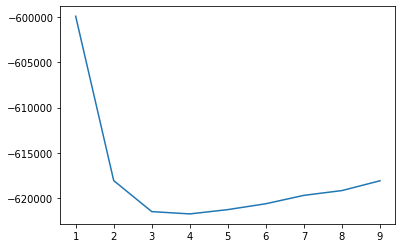

In [ ]:
plt.plot(np.arange(1,10), results)

In [45]:
# evaluamos parámetros gmm basados en bic
opt_ncomponents = np.arange(2,6)
opt_covariance = ["diag", "full", "spherical", "tied"]
results = gridsearchgmm(componentsfull, opt_ncomponents, opt_covariance)

NameError: ignored

In [ ]:
# 4 components con covariance diag es lo mejor

In [44]:
gmmfull = GaussianMixture(n_components=4, covariance_type="diag")
gmmfull.fit(componentsfull)

NameError: ignored

In [ ]:
gmmfull.sample()

(array([[ 3.04557288e-03,  4.01093005e-02,  3.94420813e-02,
          1.24415905e-03,  1.43722107e-02, -1.67370023e-02,
          2.59758800e-02,  2.06098691e-02, -4.38872205e-02,
         -2.32028796e-02,  2.27675943e-02, -1.33674337e-02,
          2.24517075e-02,  7.99458816e-05, -6.41492139e-03,
          5.37138144e-03,  1.26846797e-02,  3.39334811e-03,
         -2.07319616e-02, -3.06467526e-02,  1.20562734e-02,
         -2.41396155e-02, -1.99978075e-02, -5.16949099e-03,
         -1.69771031e-02, -1.00553200e-02, -9.20979912e-03,
          4.20220101e-03, -1.44635064e-02,  2.17639558e-02,
         -3.65711594e-03,  1.50278369e-02, -2.03169104e-02,
          5.19251128e-02,  1.07427056e-02, -2.76818646e-03,
         -1.99170965e-02,  1.27084653e-03,  2.20096509e-02,
         -4.45352833e-05, -3.24403468e-04,  5.04544171e-03,
         -4.43413702e-03,  1.05732476e-02, -1.74103415e-02,
         -3.78969748e-02,  5.90793529e-04,  7.86550327e-03,
         -3.05004882e-03, -1.33018731e-0

In [ ]:
# lo aplicamos a los datos para generar series de precios

In [ ]:
train_df.shape

(1258, 470)

In [ ]:
data_clean.values.shape

(1259, 470)

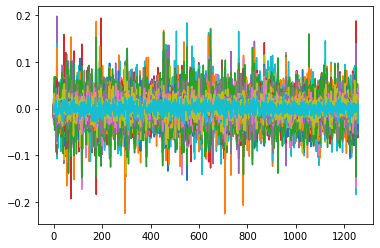

In [ ]:
components_generated = np.array([gmmfull.sample()[0][0] for _ in range(1258)])
returns_generated = pcafull.inverse_transform(components_generated)
plt.plot(returns_generated);

In [ ]:
prices_generated = np.vstack([np.log(data_clean.values[0:1]), returns_generated]).cumsum(axis=0)
prices_generated = np.exp(prices_generated)

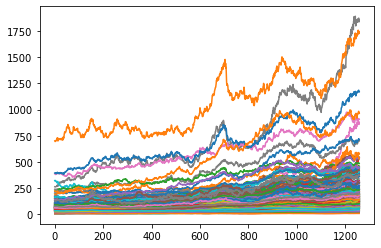

In [ ]:
plt.plot(prices_generated);

In [ ]:
def generate_prices():
    components_generated = np.array([gmmfull.sample()[0][0] for _ in range(1258)])
    returns_generated = pcafull.inverse_transform(components_generated)
    prices_generated = np.vstack([np.log(data_clean.values[0:1]), returns_generated]).cumsum(axis=0)
    prices_generated = np.exp(prices_generated)
    plt.plot(prices_generated);

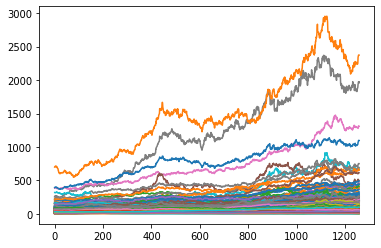

In [ ]:
generate_prices()